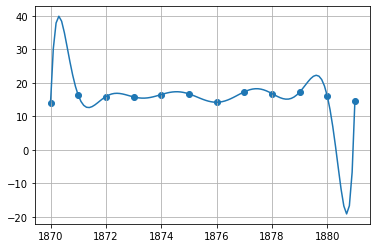

In [1]:
import csv #Задание 2 Полином Лагранжа
import numpy as np
import matplotlib.pyplot as plt 

Sochi = list()

with open("04_Сочи.csv", encoding = 'utf - 8') as r_file:
    # Создаем объект reader, указываем символ-разделитель ","
    file_reader = csv.reader(r_file, delimiter = ",")
    # Считывание данных из CSV файла
    for row in file_reader:
        Sochi.append(row)
        
SochiArr = np.zeros((len(Sochi) - 1, len(Sochi[0])))
for i in range(0, len(SochiArr)):
    for j in range(len(SochiArr[0])):
        SochiArr[i][j] = Sochi[i + 1][j]

X = SochiArr[:,0] #Выбор столбца аргументов(года)
Y = SochiArr[:, 10] #Выбор столбца значений(температура)

P = 0
yn = list()
xn = np.arange(SochiArr[0, 0], SochiArr[11, 0] + 0.1 , 0.1)
ynn = list()
xnn = np.arange(SochiArr[0, 0], SochiArr[12, 0] , 1.)

for x in xn:
    P = 0
    for i in range(12):
        L = 1.
        for j in range(12):
            if(Y[j] >= 990):
                continue
            if(i == j):
                continue
            else:
                L = L * (x - X[j])/(X[i] - X[j])
        P += L * Y[i]
    yn.append(P)
for i in range(12):
    ynn.append(Y[i])

plt.plot(xn, yn)
plt.scatter(xnn, ynn)
plt.grid(True)
plt.show()

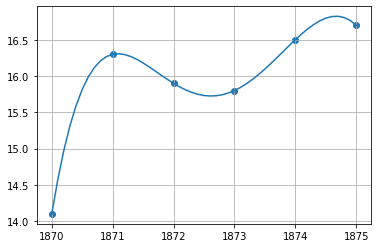

In [2]:
import csv #Задание 3 - 1-я ф-ла Ньютона
import numpy as np
import matplotlib.pyplot as plt 


ys = list()
count = 0
def Nuton(X ,Y, n):
    global count
    ys.append(Y[0])
    count += 1
    if((len(Y) >= 2) & (count < len(X))):
        dy = np.zeros(n)
        for i in range (len(Y) - 1):
            if(Y[i] < 999):
                dy[i] = (Y[i + 1] - Y[i]) / (X[count] - X[0]) 
            else:
                dy[i] = 0
        n = n - 1
        Nuton(X, dy, n)
def Polinom(X, Y, x, n):
    P = Y[0]
    for i in range(1, n):
        save = 1
        for j in range(i):
            save =  save * (x - X[j])  
        P += save * Y[i]
    return P
            
Sochi = list()

with open("04_Сочи.csv", encoding = 'utf - 8') as r_file:
    # Создаем объект reader, указываем символ-разделитель ","
    file_reader = csv.reader(r_file, delimiter = ",")
    # Считывание данных из CSV файла
    for row in file_reader:
        Sochi.append(row)
        
SochiArr = np.zeros((len(Sochi) - 1, len(Sochi[0])))
for i in range(0, len(SochiArr)):
    for j in range(len(SochiArr[0])):
        SochiArr[i][j] = Sochi[i + 1][j]

X = SochiArr[:,0]
Y = SochiArr[:, 10]

n = 6 # кол-во строк в столбце
y = np.zeros(n)
yn = list()
xn = np.arange(SochiArr[0, 0], SochiArr[(n - 1), 0] + 0.1, 0.1)
ynn = list()
xnn = np.arange(SochiArr[0, 0], SochiArr[n, 0], 1)

for i in range(n):
    y[i] = Y[i]
    ynn.append(Y[i])
for x in xn:
    Nuton(X ,y, n)
    yn.append(Polinom(X, ys, x, n))

    ys = list()
    count = 0
        
plt.plot(xn, yn)
plt.scatter(xnn,ynn)
plt.grid(True)
plt.show()

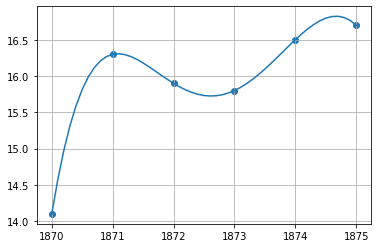

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt # задание 4 - 2-я формула Ньютона


ys = list()
count = 0

def Nuton(X ,Y, n):
    global count
    ys.append(Y[n - 1])
    count += 1
    if((len(Y) >= 2) & (count < len(X))):
        dy = np.zeros(n)
        for i in range (len(Y) - 1):
            dy[i] = (Y[i + 1] - Y[i]) / (X[count] - X[0]) 
        n = n - 1
        Nuton(X, dy, n)

def Polinom(X, Y, x, n):
    P = Y[0]
    for i in range(n - 1, 0, -1):
        save = 1
        for j in range(n - 1, i - 1, -1):
            save =  save * (x - X[j])
        P += save * Y[n - i]
    return P
            
Sochi = list()

with open("04_Сочи.csv", encoding = 'utf - 8') as r_file:
    # Создаем объект reader, указываем символ-разделитель ","
    file_reader = csv.reader(r_file, delimiter = ",")
    # Счетчик для подсчета количества строк и вывода заголовков столбцов
    count = 0
    # Считывание данных из CSV файла
    for row in file_reader:
        Sochi.append(row)        
        
SochiArr = np.zeros((len(Sochi) - 1, len(Sochi[0])))
for i in range(0, len(SochiArr)):
    for j in range(len(SochiArr[0])):
        SochiArr[i][j] = Sochi[i + 1][j]

X = SochiArr[:,0]
Y = SochiArr[:, 10]

n = 6 # кол-во строк в столбце
y = np.zeros(n)
yn = list()
xn = np.arange(SochiArr[0, 0], SochiArr[(n - 1), 0] + 0.1, 0.1)
ynn = list()
xnn = np.arange(SochiArr[0, 0], SochiArr[n, 0], 1)

for i in range(n):
    y[i] = Y[i]
    ynn.append(Y[i])
Nuton(X ,y, n)
for x in xn:
    yn.append(Polinom(X, ys, x, n))
    count = 0
        
plt.plot(xn, yn)
plt.scatter(xnn, ynn)
plt.grid(True)
plt.show()

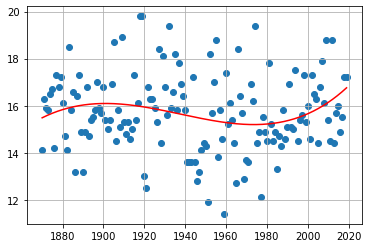

In [6]:
import csv #Задание 5 - степенной полином
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
 


def Aprocs (X, Y):
    Summ = np.zeros((5,5))
    SummY = np.zeros(5)
    save = 0
    saveY = 0
    for i in range(5):
        for j in range(5):
            if (i == 0 and j == 0):
                Summ[i][j] = len(X) + 1
                continue
           
            for k in range(len(X)):
                save += X[k] ** (j + i)
            Summ[i][j] = save
            save = 0
        for c in range(len(X)):
            if (Y[c] > 900):
                Y[c] = Y[c-1]
            saveY += Y[c] * (X[c] ** i)
        SummY[i] = saveY
        saveY = 0
                
            
    a = np.dot(np.linalg.inv(Summ), SummY)
    return a
Sochi = list()

with open("04_Сочи.csv", encoding = 'utf - 8') as r_file:
    # Создаем объект reader, указываем символ-разделитель ","
    file_reader = csv.reader(r_file, delimiter = ",")
    # Считывание данных из CSV файла
    for row in file_reader:
        Sochi.append(row)

        
        
SochiArr = np.zeros((len(Sochi) - 1, len(Sochi[0])))
for i in range(0, len(SochiArr)):
    for j in range(len(SochiArr[0])):
        SochiArr[i][j] = Sochi[i + 1][j]

X = SochiArr[:,0]
Y = SochiArr[:, 10]
x = list()
y = list()


A = Aprocs(X, Y)

yn = list()
xn = np.arange(SochiArr[0, 0], SochiArr[len(SochiArr) - 1, 0] + 0.1, 0.1)
for x in xn:
    yn.append(A[0] + A[1] * (x) + A[2] * (x) ** 2 + A[3] * (x) ** 3 + A[4] * x**4)


plt.plot(xn, yn, color = 'red')
plt.grid(True)
plt.scatter(X,Y)
plt.show()